In [2]:
!pip install mlxtend

In [1]:
from google.colab import files
import pandas as pd

# Load the file line by line into a list of lists
file_path = '/content/retail.txt'
with open(file_path, 'r') as file:
    data = [line.strip().split() for line in file]

# Convert to DataFrame and fill NaN for missing values in rows
df = pd.DataFrame(data)
df.to_csv('/content/retail.csv', index=False, header=False)
print("File saved as retail.csv")

File saved as retail.csv


In [2]:
df=pd.read_csv('/content/retail.csv')

In [3]:
transactions = df.applymap(str).values.tolist()
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
one_hot_df = pd.DataFrame(te_ary, columns=te.columns_)
min_support = 0.01
frequent_itemsets = apriori(one_hot_df, min_support=min_support, use_colnames=True)

<ipython-input-3-e5de38385d37>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  transactions = df.applymap(str).values.tolist()


In [4]:
from mlxtend.frequent_patterns import association_rules
num_itemsets = frequent_itemsets['itemsets'].nunique()

min_confidence = 0.5
rules = association_rules(frequent_itemsets,num_itemsets=num_itemsets, metric="confidence", min_threshold=min_confidence)


print("Association Rules:")
print(rules)

Association Rules:
               antecedents                consequents  antecedent support  \
0                 (%</td>)                      (nan)            0.014363   
1            ((synthetic))                    (</td>)            0.010093   
2            ((synthetic))                   (<td>No)            0.010093   
3                 (<td>No)              ((synthetic))            0.010481   
4            ((synthetic))                      (nan)            0.010093   
..                     ...                        ...                 ...   
126  ((synthetic), <td>No)               (</td>, nan)            0.010093   
127     ((synthetic), nan)            (</td>, <td>No)            0.010093   
128          (<td>No, nan)       (</td>, (synthetic))            0.010481   
129          ((synthetic))       (</td>, <td>No, nan)            0.010093   
130               (<td>No)  (</td>, (synthetic), nan)            0.010481   

     consequent support   support  confidence       lift

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


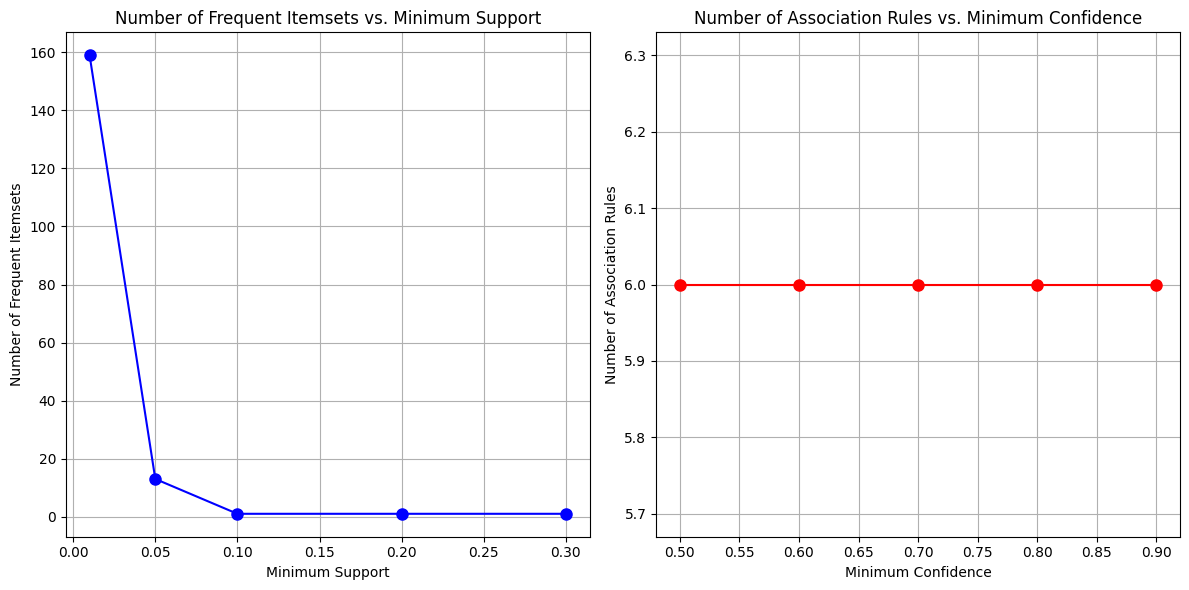

In [5]:
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

# Assuming 'one_hot_df' is your one-hot encoded transaction DataFrame

# List of minimum support values to test
support_thresholds = [0.01, 0.05, 0.1, 0.2, 0.3]
# List of minimum confidence values to test
confidence_thresholds = [0.5, 0.6, 0.7, 0.8, 0.9]

# Initialize lists to store the number of frequent itemsets and association rules
num_frequent_itemsets = []
num_association_rules = []

# Loop over support thresholds and count the number of frequent itemsets
for support in support_thresholds:
    frequent_itemsets = apriori(one_hot_df, min_support=support, use_colnames=True)
    num_frequent_itemsets.append(len(frequent_itemsets))

# Loop over confidence thresholds and count the number of association rules
for confidence in confidence_thresholds:
    # First, find frequent itemsets with a minimum support threshold
    frequent_itemsets = apriori(one_hot_df, min_support=0.05, use_colnames=True)
    num_itemsets = frequent_itemsets['itemsets'].nunique()
    # Generate association rules with the current confidence threshold
    rules = association_rules(frequent_itemsets,num_itemsets=num_itemsets, metric="confidence", min_threshold=confidence)
    num_association_rules.append(len(rules))

# Plotting the number of frequent itemsets vs. minimum support
plt.figure(figsize=(12, 6))

# Plot for frequent itemsets
plt.subplot(1, 2, 1)
plt.plot(support_thresholds, num_frequent_itemsets, marker='o', color='b', linestyle='-', markersize=8)
plt.title('Number of Frequent Itemsets vs. Minimum Support')
plt.xlabel('Minimum Support')
plt.ylabel('Number of Frequent Itemsets')
plt.grid(True)

# Plot for association rules
plt.subplot(1, 2, 2)
plt.plot(confidence_thresholds, num_association_rules, marker='o', color='r', linestyle='-', markersize=8)
plt.title('Number of Association Rules vs. Minimum Confidence')
plt.xlabel('Minimum Confidence')
plt.ylabel('Number of Association Rules')
plt.grid(True)

# Display the plots
plt.tight_layout()
plt.show()